Importing libraries

In [8]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset

In [9]:
rate = None

if rate:
    file_path = './dataset/refined_arknights_dataset.csv'  
else:
    file_path = './dataset/statfoc_arknights_dataset.csv'      
data = pd.read_csv(file_path)

Display basic info

In [10]:
print("Dataset Overview:")
print(data.head())

Dataset Overview:
   elite_1_hp  elite_1_atk  elite_1_def  elite_1_res  elite_1_dp_cost  \
0        1191          353           90            0                3   
1         495          172           41            0                3   
2         435           70           27            0                3   
3        1443          260          443           50                3   
4        1461          432           50           10               24   

   elite_1_block  elite_1_interval  max_hp  max_atk  max_def  max_res  \
0              1                 1       0        0        0        0   
1              1                 1       0        0        0        0   
2              1                 2       0        0        0        0   
3              0                 0       0        0        0        0   
4              1                 2       0        0        0        0   

   max_dp_cost  max_block  max_interval              name       class  \
0            0          0      

Handle missing values by assigning 0

In [11]:
data.fillna(0, inplace=True)

# Feature definition

In [12]:
early_game_features = ['elite_1_hp', 'elite_1_atk', 'elite_1_def', 'elite_1_res', 
                       'elite_1_dp_cost', 'elite_1_block', 'elite_1_interval']
endgame_features = ['max_hp', 'max_atk', 'max_def', 'max_res', 
                    'max_dp_cost', 'max_block', 'max_interval']

Extract the features for early-game and endgame clustering

In [13]:
early_game_data = data[early_game_features]
endgame_data = data[endgame_features]

Scale data

In [14]:
scaler = StandardScaler()
scaled_early_game = scaler.fit_transform(early_game_data)
scaled_endgame = scaler.fit_transform(endgame_data)

In [15]:
def elbow_method(data, title):
    distortions = []
    K = range(1, 11)
    for k in K:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(data)
        distortions.append(kmeans.inertia_)

    plt.figure(figsize=(8, 5))
    plt.plot(K, distortions, 'bx-')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Distortion')
    plt.title(title)
    plt.show()

Elbow method to find K

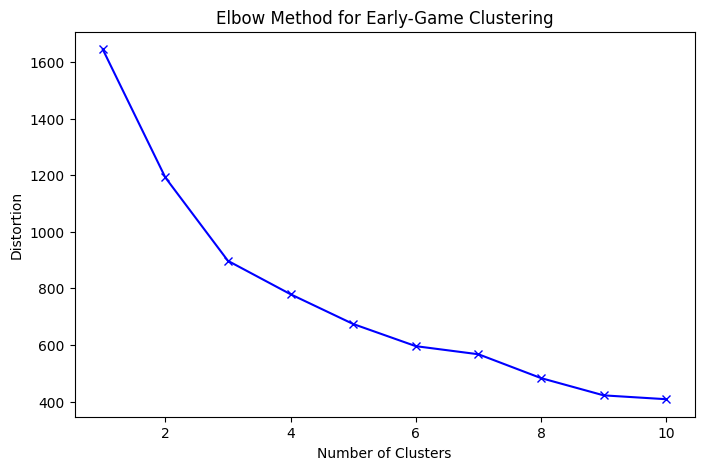

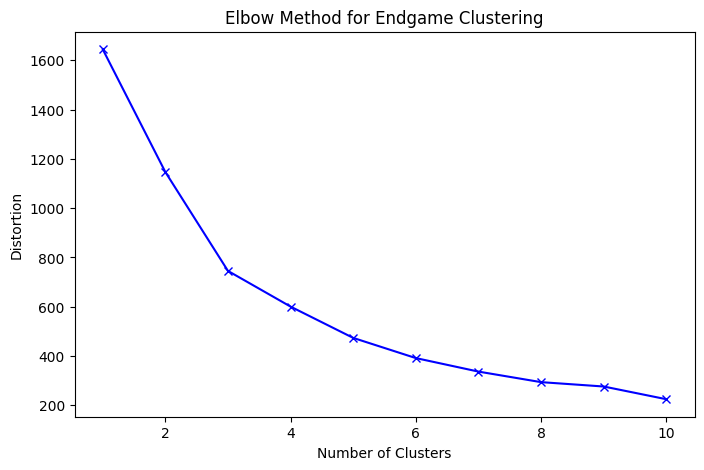

In [16]:
elbow_method(scaled_early_game, "Elbow Method for Early-Game Clustering")
elbow_method(scaled_endgame, "Elbow Method for Endgame Clustering")

Define K

In [17]:
k_early_game = 3  
k_endgame = 3     

# K-means

In [18]:
kmeans_early = KMeans(n_clusters=k_early_game, random_state=42)
kmeans_endgame = KMeans(n_clusters=k_endgame, random_state=42)

# Fitting

In [19]:
data['early_game_cluster'] = kmeans_early.fit_predict(scaled_early_game)
data['endgame_cluster'] = kmeans_endgame.fit_predict(scaled_endgame)

# Visualization for Early-game

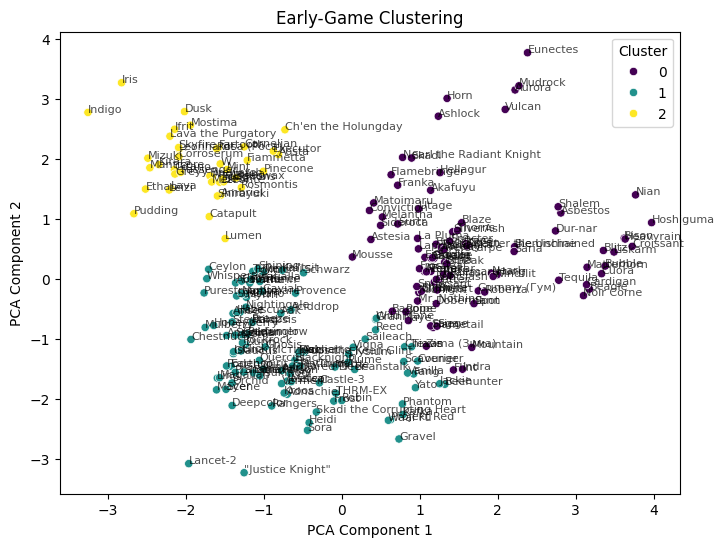

In [20]:
pca = PCA(n_components=2)
early_game_pca = pca.fit_transform(scaled_early_game)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=early_game_pca[:, 0], y=early_game_pca[:, 1], 
                hue=data['early_game_cluster'], palette='viridis')
plt.title('Early-Game Clustering')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')

# Annotate each point with the operator name
for i, operator_name in enumerate(data['name']):  # Assuming 'operator_name' is the column with names
    plt.annotate(operator_name, (early_game_pca[i, 0], early_game_pca[i, 1]), fontsize=8, alpha=0.7)

plt.show()

# Visualization for Endgame

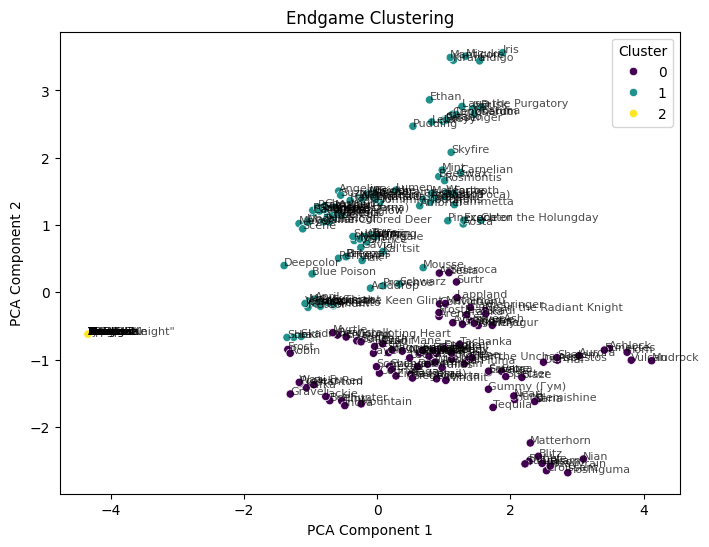

In [21]:
endgame_pca = pca.fit_transform(scaled_endgame)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=endgame_pca[:, 0], y=endgame_pca[:, 1], 
                hue=data['endgame_cluster'], palette='viridis')
plt.title('Endgame Clustering')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')

# Annotate each point with the operator name
for i, operator_name in enumerate(data['name']):  # Assuming 'operator_name' is the column with names
    plt.annotate(operator_name, (endgame_pca[i, 0], endgame_pca[i, 1]), fontsize=8, alpha=0.7)

plt.show()

In [22]:
# Analyze early-game clusters
early_game_cluster_means = data.groupby('early_game_cluster')[early_game_features].mean()
print("Early-game Cluster Characteristics:")
print(early_game_cluster_means)

# Analyze endgame clusters
endgame_cluster_means = data.groupby('endgame_cluster')[endgame_features].mean()
print("Endgame Cluster Characteristics:")
print(endgame_cluster_means)

Early-game Cluster Characteristics:
                     elite_1_hp  elite_1_atk  elite_1_def  elite_1_res  \
early_game_cluster                                                       
0                   1612.677778   397.733333   263.166667     2.166667   
1                    962.057692   290.557692   115.125000     4.807692   
2                   1082.365854   525.780488   104.390244     6.951220   

                    elite_1_dp_cost  elite_1_block  elite_1_interval  
early_game_cluster                                                    
0                         16.766667       1.911111          0.988889  
1                         12.048077       1.067308          1.115385  
2                         24.609756       0.902439          2.146341  
Endgame Cluster Characteristics:
                      max_hp     max_atk     max_def    max_res  max_dp_cost  \
endgame_cluster                                                                
0                2602.067961  621.864078  408

<Figure size 1200x600 with 0 Axes>

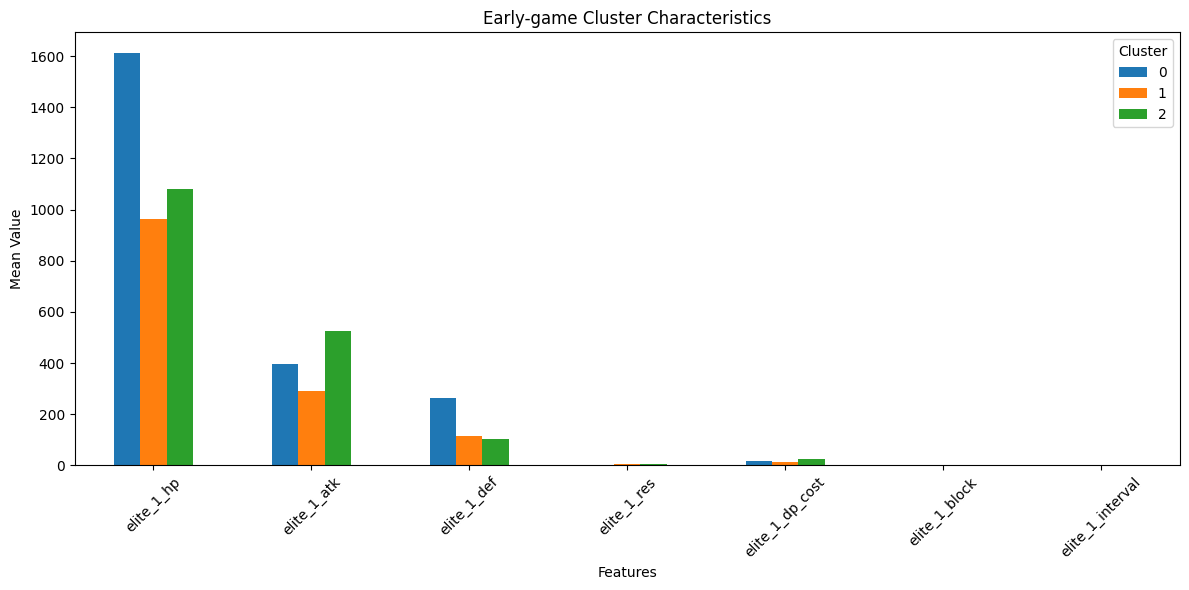

In [23]:
plt.figure(figsize=(12, 6))
early_game_cluster_means.T.plot(kind='bar', figsize=(12, 6))
plt.title('Early-game Cluster Characteristics')
plt.ylabel('Mean Value')
plt.xlabel('Features')
plt.xticks(rotation=45)
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()

<Figure size 1200x600 with 0 Axes>

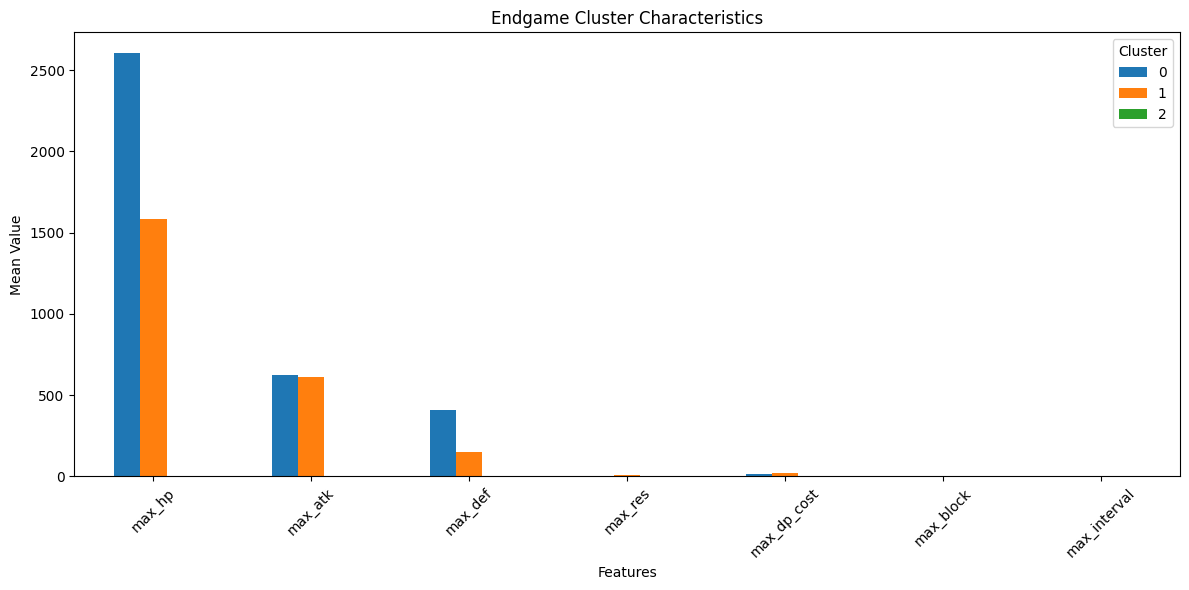

In [24]:
plt.figure(figsize=(12, 6))
endgame_cluster_means.T.plot(kind='bar', figsize=(12, 6))
plt.title('Endgame Cluster Characteristics')
plt.ylabel('Mean Value')
plt.xlabel('Features')
plt.xticks(rotation=45)
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()

In [25]:
"""plt.figure(figsize=(10, 8))
sns.heatmap(endgame_cluster_means, annot=True, cmap='viridis', fmt=".2f")
plt.title('Endgame Cluster Characteristics')
plt.ylabel('Cluster')
plt.xlabel('Features')
plt.show()"""

'plt.figure(figsize=(10, 8))\nsns.heatmap(endgame_cluster_means, annot=True, cmap=\'viridis\', fmt=".2f")\nplt.title(\'Endgame Cluster Characteristics\')\nplt.ylabel(\'Cluster\')\nplt.xlabel(\'Features\')\nplt.show()'

Save results

In [26]:
data.to_csv('clustered_arknights_dataset.csv', index=False)
print("Clustered dataset saved as 'clustered_arknights_dataset.csv'.")

Clustered dataset saved as 'clustered_arknights_dataset.csv'.
